# **- Machine Learning -**
# _* ``Unsupervised Learning`` with Python *_
## **+ '``Clustering``' +**
### **--- *" K-means Clustering, 'ELBOW' " , " Hierarchical Clustering "* ---**
### **----- Parameters : *(kernel='rbf') , (kernel='linear') , (kernel='poly') , ...* -----**
### **----- Parameters : *(n_clusters=2) , (affinity='euclidean') , (linkage='ward') , ...* -----**
### **+ _Mall Customers Data_ +**

# **+ Unsupervised Learning +**
**``Unsupervised Learning``** teknikleri biraz daha farklıdır... En büyük fark da **'y'** yoktur. Yani TARGET kolonu **yoktur...** Yani Tahmin etmeye çalıştığımız bir değer **yoktur...**
<br> **Unsupervised Learning ,** Veri Setinin içinde farklı gruplar var mı diye öğrenmek için kullanılabilir.
<br> **Unsupervised Learning , dimension reduction (boyut indirgeme)** yapmak için kullanılabilir...
<br> **Unsupervised Learning ,** ile ne yapıyorsak **Feature Space** içerisinde yapıyoruz... **'y'** değerini hiç bilmiyoruz...
<br> **Unsupervised Learning , Supervised Learning**'e göre biraz daha zordur... Çünkü **Unsupervised Learning** çalışmalarında **, objektif** değerlendirme metriklerimiz yoktur... Yani mesela **Cross Validation** gibi bir tekniği kullanamayacağız... Çünkü daha önce de söylediğimiz gibi **,** kullanabileceğimiz bir **'y'** değeri yok... Bildiğimiz bir **'y'** değeri olmadığı için de bir **Tahmin** ve **Karşılaştırma** yapamıyoruz... Yani **Unsupervised Learning**'de 'iyi - kötü' diyebileceğimiz **objektif** hiçbir şey yok...

Mesela **;** online bir alışveriş sitesi **,** müşterilerini gruplamaya çalışıyor... Burada **Unsupervised Learning** teknikleri kullanılabilir...
<br> Mesela **;** Twitter kullancılarının farklı olaylara olan reaksiyonları üzerinden **,** kullanıcıları gruplamaya çalışıyoruz... Kimse bize kimin nasıl bir Twitter kullanıcısı olduğunu söylemiyor. Yani **'label'**'lenmiş bir Veri Setimiz yok... Biz kullanıcıları **,** davranışları üzerinden başka başka gruplara bölüyoruz...

En çok kullanılan **Unsupervised Learning** yöntemlerinden bir tanesi **'``Clustering``'** yöntemidir... Bu yöntem **,** Veri Setinin içerisinde **küçük gruplar** var mı diye araştırır. Ve **bulduğu benzerliklere** göre **küçük gruplara** böler... Yani Veri Setini **,** Featureler üzerinden **segmentation**'lara ayırır.

+ **Burada iki tane yöntem göreceğiz :**
+ + **``K-means Clustering``**
+ + **``Hierarchical Clustering``**

# **-** K-Means Clustering **-**
-- Amacımız **,** Veri Setini **'K'** tane kümeye ayırmaktır... **'K'** tane birbiri ile **overlap etmeyen (kesişmeyen) 'cluster'** bulmaya çalışıyoruz... Çünkü bir veri noktasını **,** bir **'cluster'**'e koymuşsak eğer **,** artık başka bir **'cluster'**'e koymamamız lazım **!**
<br> -- Veri Setimizi öyle bir gruplayacağız ki **;** bir **'cluster'**'in içerisindeki **her bir** elemanın **,** o **'cluster'**'in ORTA NOKTASINA olan uzaklıklarının KARALERİNİN TOPLAMI **MİNİMUM** olsun **!** 
<br> -- Yani **'K-means Clustering'** Tekniği **,** Veri Setini alıyor ve BİZİM İSTEDİĞİMİZ KADAR parçaya bölmeye çalışıyor... Ve her bir grubun (parçanın) içerisindeki veri noktalarının **,** birbirlerine olan uzaklıklarının MİNİMUM olmasını istiyor...  
+ **-- KMeans Algoritması şu şekilde çalışıyor :**
+ + İlk başta **,** kaç gruba bölmek istiyorsak RASTGELE o kadar RENK atıyor...
+ + Sonra **,** ORTA NOKTALARI (Centroid'leri) hesaplamaya çalışıyor...
+ + Sonra da bu RENK RENK ayırdığımız ORTA NOKTALARIN her birine en yakın olan veri noktalarını o RENGE atıyor...
+ + Sonra CENTROID'leri tekrar hesaplıyor.
+ + Sonra da bu CENTROID'lere en yakın olan veri noktalarını **,** o CENTROID'lerin RENGİNE atıyor...
+ + Sonra da **,** tekrar bir Küme (Grup) ataması yapıp veri noktalarının son tahlilde hangi grupta olduklarını karar veriyor...
+ + Son olarak da bu Gruplamada son halini almış veri noktalarının her bir Küme için tekrar CENTROID'lerini hesaplıyoruz ve bu şekilde son haline kavuşturuyor...
+ + Yani gördüğümüz gibi **;** bir CENTROID hesabı yapıyor bir GRUPLUYOR **,** bir CENTROID hesabı yapıyor bir GRUPLUYOR... Bu şekilde yapa yapa Veri Setimizi son haline kavuşturuyor... Yani böylelikle **'KMeans Clustering'** oluşturulmuş oluyor...
+ Bu süreç de sırası ile **, '``9.2_KMeans_Clustering``'** isimli PNG dosyasında da görsel olarak anlatılıyor...

#### Import Libraries **:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Creating the Clusters **:**

In [2]:
from sklearn.cluster import KMeans

## Clustering with **'Mall Customers Data' :**

Veri Setimizde toplamda **200** tane müşterimiz var. Bu müşterilerin **Gelirleri** Ve **Harcama Skorları** var...

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40
...,...,...,...
195,196,120,79
196,197,126,28
197,198,126,74
198,199,137,18


+ Öncelikle Veri Setimizden **'Customer ID'** kolonunu **drop** edelim ve geri kalan iki kolonu **grafikte** gösterelim **:**

In [4]:
X = df.iloc[: , [1, 2]].values

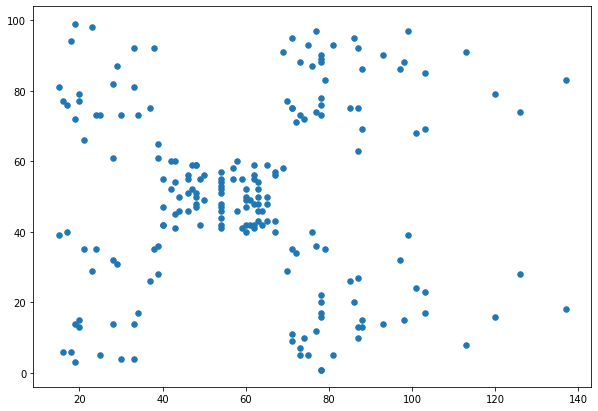

In [9]:
plt.figure(figsize=(10 , 7))
plt.scatter(X[:, 0] , X[:, 1] , s=30)

Yukarıdaki grafikte gördüğümüz gibi **,** Veri Setimizde muhtemelen **'5'** tane küçük grup var...

+ Şimdi de **'KMeans'** tekniğini kullanrak **, 'K'** değeri **'5'** olan bir model kuralım **:**

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

kmeans.fit(X)

KMeans(n_clusters=5)

+ Şimdi de **, '5'**'e böldüğümüz Veri Setinin **her bir** küçük grubunun MERKEZ (CENTER) KOORDİNATLARINI hesaplayalım **:**

In [13]:
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

+ Şimdi de **her bir veri noktasının 'etiket' değerlerine (Label'lerine)** bakalım **:**
<br> Yani modelimizin **,** her bir veri noktasını **,** hangi gruba attığına görelim **:**

In [14]:
kmeans.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

+ Şimdi de Veri Setini **, LABEL**'lere göre çizdirelim **:**
<br> Yani her bir LABEL'e **,** Rastgele bir RENK verelim **:**

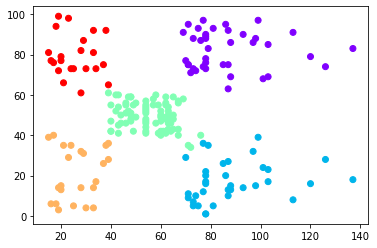

In [15]:
plt.scatter(X[:, 0] , X[:, 1] , c=kmeans.labels_ , cmap='rainbow')

**++++ NOTE ++++**
<br> **'``inertia_``'** metodu **;** Veri Setinin **, 'KMeans'** tarafından ne kadar iyi kümelendiğini ölçer.
<br> Her bir veri noktası ile **merkezi** arasındaki **mesafe** ölçülür ve bu **mesafelerin KARELERİNİN TOPLAMI** alınarak hesaplanır...

İyi bir model **, düşük 'inertia''ya (atalete)** ve az sayıda kümeye **(K)** sahip olan modeldir... Yani OPTIMUM sonucu bulan modeldir...
<br> Veri Setimizi ne kadar **az** kümeye bölersek **, 'inertia_'** değeri o kadar **artar.** Çünkü CENTROID'e olan mesefeler **artar...**

In [16]:
kmeans.inertia_

44448.45544793371

+ Mesela Veri Setini şimdi de **'2'** Gruba ayıralım **:**

In [17]:
kmeans2 = KMeans(n_clusters=2)

kmeans2.fit(X)

KMeans(n_clusters=2)

**++++ CRITICAL NOTE ++++**
<br> Gördüğümüz gibi bu **Unsupervised Learning** işlemlerinde **,** TRAIN - TEST gibi şeyler de yok...

+ Şimdi de Veri Setini **, LABEL**'lere göre çizdirelim **:**
<br> Yani her bir LABEL'e **,** Rastgele bir RENK verelim **:**

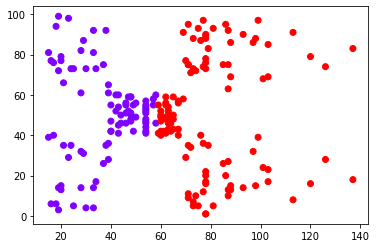

In [18]:
plt.scatter(X[:, 0] , X[:, 1] , c=kmeans2.labels_ , cmap='rainbow')

In [19]:
kmeans2.inertia_

181363.59595959593

Yukarıda gördüğümüz gibi **,** Veri Setini iki gruba böldüğümüzde **, 'inertia'** değeri arttı. Yani istenildiği gibi bir parçalama yapmamışız... Demekki daha çok gruba bölmekte fayda var... Zaten bunu grafiğe bakınca da görebiliyoruz...

+ Mesela Veri Setini şimdi de **'7'** gruba ayıralım **:**

In [20]:
kmeans3 = KMeans(n_clusters=7)

kmeans3.fit(X)

KMeans(n_clusters=7)

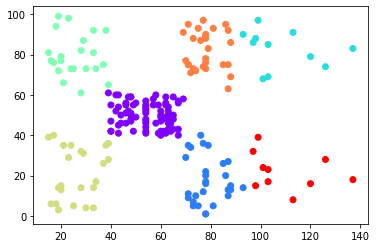

In [21]:
plt.scatter(X[:, 0] , X[:, 1] , c=kmeans3.labels_ , cmap='rainbow')

In [22]:
kmeans3.inertia_

30259.65720728547

Burada hem önceki modellerin hepsinden daha küçük bir **'inertia'** değeri yakalayabildik **,** hem de grafiğe baktığımızda gayet uygun bir parçalama yapılmış gibi...
<br> ANCAK bundan emin miyiz **?**
<br> **'5'**'e parçalamak da yeterli olabilir miydi **?**
<br> **'7'**'ye bölerek abarttık mı **?**

**++++ NOTE ++++**
<br> Veri Setimizi kaç **gruba (cluster'e)** parçalayacağız **?** Buna nasıl karar verebiliriz **?**
<br> -- Başlangıçta bize ne yapmamız gerektiğini söyleyen hiçbir şey yok... Ürettiğimiz değerler **,** genel olarak SUBJEKTIF (Öznel) değerlerdir...
<br> **Unsupervised Learning**'in zor tarafı da budur... Yapacağımız şeyler genel olarak SUBJEKTIF olacaktır...

### **ELBOW (DİRSEK)** Metodu **:**
+ Farklı farklı **Cluster**'ler FIT edelim **:**
<br> Yani Veri Setimizi **,** farklı sayılarda parçalara bölelim ve hepsini FIT edelim **:**
<br> Ortaya çıkan **'inertia'** değerlerini de bir Listeye atayalım **:**

In [23]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1 , 11):
    kmeans = KMeans(n_clusters= i , init='k-means++' , random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\anaconda3\envs\ITUmindset\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


+ Visualizing the **'ELBOW'** method to get the optimal value of **'K' :**
+ Optimal **'K'** değerini elde etmek için kullanılan **'``ELBOW (DİRSEK)``'** metodunu **,** görselleştirelim **:**

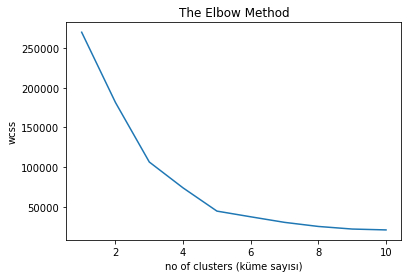

In [24]:
plt.plot(range(1, 11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters (küme sayısı)')
plt.ylabel('wcss')
plt.show()

Yukarıdaki grafikte gördüğümüz gibi **, '5' Cluster**'den sonra **'inertia'** değeri çok da düşmüyor... Ve daha fazla **Cluster**'in pek bir anlamı olmayacağı görülüyor...

+ **Sadece '``.fit_predict( )``'** fonksiyonunu kullanarak **,** ÖNCE FIT edelim SONRA da PREDICT edelim **:**

In [25]:
kmeansModel = KMeans(n_clusters= 5 , init='k-means++' , random_state=0)

y_kmeans = kmeansModel.fit_predict(X)

y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

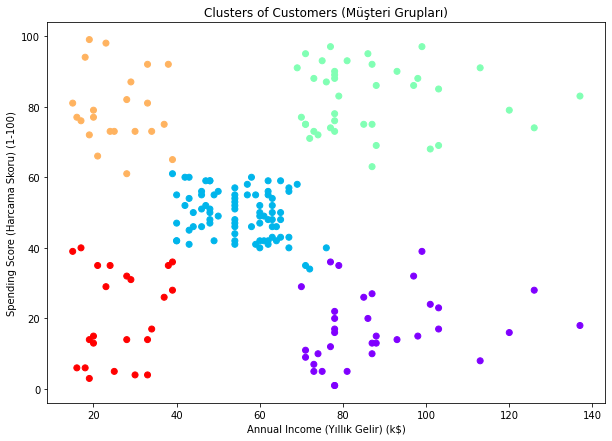

In [26]:
#   Visualizing all the clusters :
#   Tüm kümeleri görselleştirelim :

plt.figure(figsize=(10, 7))
plt.scatter(X[:,0] , X[:,1] , c=y_kmeans , cmap='rainbow')
plt.title('Clusters of Customers (Müşteri Grupları)')
plt.xlabel('Annual Income (Yıllık Gelir) (k$)')
plt.ylabel('Spending Score (Harcama Skoru) (1-100)')
plt.show()

**++++ CRITICAL NOTE ++++**
<br> Eğer Veri Setimizde **'Kategorik' Değişkenler (Featureler)** olsaydı **, Distance (Mesafe)** tanımlamamız değişecekti... **'Kategorik' Değişkenler (Featureler)** olduğunda CENTROID'i hesaplama sıkıntısı yaşanacak...
<br> Bu sorunu çözmek için de **;** ya o **'Kategorik' Feature**'leri **'Numerik' Rakamlara** çevireceğiz **,** ya da **BAŞKA Metrik'ler** kullanacağız... Bu işlemi yapabileceğimiz başka Metriklerimiz de literatürde vardır... 

# **-** Hierarchical Clustering (Hiyerarşik kümeleme) **-**

Bu yöntemde de **;** Veri Setindeki bir veriyi alıyoruz ve yine Mesafeler üzerinden BİRLEŞTİRE BİRLEŞTİRE yukarıya çıkarak Sınıflamalar yapıyoruz...
<br> Mesela şöyle bir şey yapıyoruz **;** birbirine **en yakın** olan **iki tane veri noktasını** öncelikle bi Grupluyoruz **,** sonra diğer **en yakın** olan **iki tane veri noktasını** yine kendi aralarında Grupluyoruz... Sonra da bu **İkililere en yakın olan veri noktasını** bu **İkililer** ile Grupluyoruz ve **Üçlüler** oluşuyor... Bu şekilde YUKARIYA çıka çıka devam ediyoruz... Ve en sonunda da **bütün veri noktaları birleştirilmiş oluyor...** Yani veri noktalarının **birbirlerine yakınlığı** üzerinden BİRLEŞTİRE BİRLEŞTİRE **hiyerarşik** bir Gruplama oluşturduk... Bu işleme de **'``Dendrogram``'** diyoruz...
<br> Sonra da bu **hiyerarşik** olarak oluşturduğumuz Grubu **, seviye seviye 'Cluster'**'lere parçalayabiliriz...

**Distance'ler (Mesafeler)** ne kadar **uzun** ise **, Gruplar** da birbirlerine o kadar **uzaklardır...** Yani **Distance**'ler bir **Uzaklık ifadesidir...**

**Dendogram**'ı öyle bir yerden **ayırmalıyız ('Clustering' yapmalıyız)** ki **, Distance'ler (Mesafeler)** olabilecek MAKSIMUM Uzunlukta olsun... Yani **Grupların ,** birbirlerine olan mesafeleri MAKSIMUM olsun... Yani ayırdıktan kısa süre sonra **,** Mesafeler azalmaya başlıyor olsun...

Tam benzemese de **, 'KMeans'** tekniğindeki **'ELBOW'** metodunda yaptığımız işlem gibi bir yaklaşım düşünebiliriz...

**++++ NOTE ++++**
+ Peki mesela bu **İkili Gruplar** ile diğer veri noktaları arasındaki Mesafeyi nasıl tanımlamamız gerekiyor **?**
+ + Bunun için farklı yöntemler vardır...
+ + Mesela şunu yapabiliriz **;** bu **İkililerin** kendi aralarındaki MERKEZ NOKTASINI (CENTROID'ini) kullanarak **,** diğer veri noktaları ile aralarındaki Mesafeyi tanımlayabiliriz... Daha sonra da **,** bir YUKARIYA çıktığımızda **Üçlülerin** MERKEZ NOKTASINI alarak diğer veri noktaları ile aralarındaki Mesafeyi tanımlayabiliriz...
<br> Bu ORTA NOKTAYI alma işlemi **,** yöntemlerimizden sadece bir tanesidir...
+ **'9.5_Hierarchical_Clustering.jpg'** isimli JPG dosyasına bakarak **,** diğer yöntemleri görebiliriz...
**--**
+ **'Hierarchical Clustering' tekniği kullanırken , aşağıdaki soruları sormamız lazım :**
+ + Öncelikle bir **Uzaklık Tanımı** yapmamız lazım... Yani hangi ölçüye göre uzaklığı tanımlayacağız **?** Mesela **'Öklit'** uzaklığı mı **?** Veya başka bir uzaklık mı **?..** Öncelikle bunu tanımlamamız lazım... **(affinity=...)**
+ + Ayrıca **,** Veri Setindeki bu veri noktalarını bir araya getirirken hangi **'linkage' (bağ , bağlantı)** yöntemini kullanmamız gerekiyor **?** Buna da karar vereceğiz... **(** Bu yöntemler **: 'Complete' , 'Single' , 'Average'** ve **'Centroid'** yöntemleridir... **) (linkage=...)** 
+ + Ve ayrıca **, Dendogram**'ı katederken nereden katetmeliyiz **?** Buna da karar vermek lazım... Yani **'Clustering'** işlemini nereden yapmamız lazım... **(n_clusters=...)**
+ Bu işlemleri yapmak için Standart yöntemler ne yazık ki yok... Bundan dolayı daha SUBJEKTİF yöntemler deniyoruz...

**+--- NOTE ---> 'Hierarchical Clustering'** tekniği **, OUTLIER (Aykırı)** verileri bulmak için iyi bir yöntemdir...

In [28]:
from sklearn.cluster import AgglomerativeClustering

#   Dendrogram Çizdirebilmek için :
from scipy.cluster.hierarchy import dendrogram

+ **``Hierarchical Clustering``** yapmak için kullandığımız modül olan **``AgglomerativeClustering( )``** modülünün içerisinde hangi Parametreler varmış bir bakalım **:**

In [29]:
AgglomerativeClustering()

AgglomerativeClustering()

+ + **(n_clusters=...)** Parametresi ile **: Number of Cluster** sayısını belirleyebiliyoruz. Yani Veri Setini kaç **Gruba** ayıracağımızı söyleyebiliyoruz... DEFAULT olarak **Cluster** sayımız **'2'**'dir...
<br> Başlangıçta **Number of Cluster** sayımızı belirlersek de **;** Veri Setimizi **,** LABELLENMİŞ bir şekilde görebiliriz...
+ + **(affinity=...)** Parametresi ile **:** Bir veri noktasının başka bir veri noktasına olan **Uzaklığını ,** **HANGİ Metrik** ile ölçeceğiz **?** Bunun kararını veriyoruz... DEFAULT olarak **'euclidean'** Metriğini kullanır...
<br> Kullandığımız Metriğin **,** bizim için anlamlı ve aynı zamanda Veri Seti ile de uyumlu olması lazım... Bir **input**'umuzun (veri noktamızın) başka bir **input** ile olan Mesafesi bizim için nasıl Tanımlanabiliyor ise **,** ona göre farklı Metrikler seçebiliriz... Mesela **'manhattan'** metriği bizim için anlamlı bir metrik olabilir... gibi ...
+ + **(linkage=...)** Parametresi ile **: Tekrar Gruplarken ,** yani **bir Grubu başka bir Gruba bağlarken ;** Aralarındaki Mesafeyi ne ile Tanımlayacağız **?** Bunun kararını veriyoruz... DEFAULT olarak **"ward" linkage'sini (bağlantısını)** kullanır...
+ + + Yani **"ward" linkage**'si ile **;** iki **Cluster**'i birbirlerine bağlarken **, Varyansları Minimize** ediyor...
+ + + **"average" linkage**'si ile **; Distance**'lerin **Averajlarını** kullanıyor...
+ + + **"complate"** ve **"maksimum" linkage**'leri ile de **; Maksimum Distance**'yi belirleyerek yapıyor...

**++++ NOTE ++++**
+ Aslında özünde yapılan şey **,** bir **Ağaç** oluşturup **,** yani **Dendrogram** oluşturup **;** sonra da bu Ağacı En İdeal yerden **katetmektir ('Cluster' yapmaktır...) ...**
+ Ayrıca **,** Her Bir veri noktasının **,** birbirlerine ne kadarlık bir Mesafede olduğuna da bakabiliyoruz...
<br> Mesela elimizde Ülkeler ile ilgili bir Veri Seti var **;** ülkeleri **, Dendrogram** ile birbirleriyle birleştirmeye çalışıyoruz... Tabiki ülkelerin farklı farklı özellikleri var... Birbirlerine en çok benzeyen ülkeleri ilk başta birbirleri ile grupluyoruz ve sonra da **Dendrogram** ile YUKARIYA doğru gidiyoruz. Geriye kalan veri noktaları da kendilerine **en çok** benzeyen Gruplara sırası ile dahil oluyorlar... Ve böyle böyle YUKARIYA doğru gidiyoruz... Ve böylece bir **Visualization (Görselleştirme)** yapmış oluyoruz... Sonra da istersek bir **Clustering** yapıyoruz. Ya da direkt sadece bu **Visualization**'un kendisini kullanıyoruz...
<br> İşte bu işlemlere **, Hierarchical Clustering** diyoruz...

**+--- CRITICAL NOTE ---> Unsupervised Learning** yöntemi ile yaptığımız işlemlere **Sınıflama** DENEMEZ **!**
<br> **Unsupervised Learning** yöntemi ile yaptığımız işlemlere **'Kümeleme'** veya **'Gruplama'** DENİR **!**

+ **Hierarchical Clustering** tekniğimiz ile bir model kuralım ve FIT edelim **:**

In [30]:
#   Setting 'distance_threshold=0' ensures we compute the full tree :
#   'distance_threshold=0' ayarı , TÜM Ağacı hesaplamamızı sağlar :

h_cluster = AgglomerativeClustering(distance_threshold=0 , n_clusters=None , linkage='ward')
h_cluster.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

Aşağıdaki **,** **"$**$kwargs"** KODU **;** Argüman yollamak için kullanılır... Söylediğimiz modelin argümanlarını (parametrelerini) **,** kendi içerisine yollar... Yani FIT ettiğimiz **Cluster**'in farklı Parametrelerini de fonksiyonun içerisine yolluyor...

In [31]:
def plot_dendrogram(model , **kwargs):
    #   Create 'linkage' matrix and then plot the dendrogram :
    #   'Bağlantı (Linkage)' matrisi oluşturun ve ardından dendrogramı çizin :

    #   Create the counts of samples under each 'node' :
    #   Her 'düğüm''ün altındaki örnek sayılarını oluşturun :
    
    counts = np.zeros(model.children_.shape[0])
    
    n_samples = len(model.labels_)
    
    for i , merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1   # Leaf node (Yaprak düğümü)
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_ , model.distances_ , counts]).astype(float)

    #   Plot the corresponding dendrogram :
    dendrogram(linkage_matrix , **kwargs)

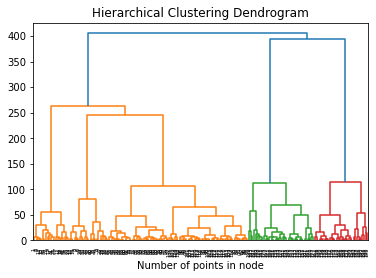

In [37]:
plt.title('Hierarchical Clustering Dendrogram')

#   Plot the top three levels of the dendrogram :
#   Dendrogramın ilk üç seviyesini çizin :

plot_dendrogram(h_cluster , truncate_mode='level' , p=10)

plt.xlabel("Number of points in node")

plt.show()

+ **Cluster** sayısını değiştirerek yeni bir model FIT edelim **:**

In [38]:
h_cluster = AgglomerativeClustering(affinity='euclidean' , linkage='ward' , n_clusters=5)
h_cluster.fit(X)

AgglomerativeClustering(n_clusters=5)

+ Şimdi de **,** her bir veri noktası için oluşturulan LABEL'leri görelim **:**
<br> Yani her bir veri noktasının hangi **Cluster** içerisinde olduğunu görelim **:**

In [39]:
h_cluster.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

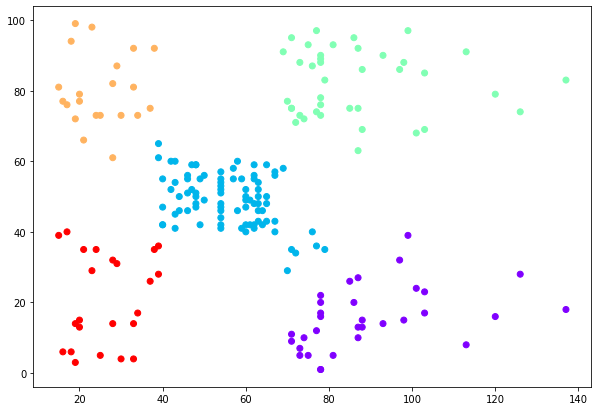

In [40]:
plt.figure(figsize=(10 , 7))
plt.scatter(X[:, 0] , X[:, 1] , c=h_cluster.labels_ , cmap='rainbow')

**++++ NOTE ++++**
+ **'Unsupervised Learning' için bu 'CLUSTERING' tekniklerinden başka ;**
+ + **"PCA ( Principal Component Analysis) Temel Bileşenler Analizi" , "AutoEncoder (OtoKodlayıcı)"** veya **"Anomali Tespiti (Anomaly Detection)"** gibi teknikler de vardır...
+ **Ayrıca yine bir CLUSTERING tekniği kullanacaksak **,** başka CLUSTERING yöntemleri de vardır ;**
+ + **"K Medoids Clustering" , "DBSCAN Clustering"** veya **"Fuzzy Clustering"** teknikleri gibi...
+ + Veya çeşitli **"Spectral Clustering (Gaussian Mixture Models , vb...)"** yöntemleri gibi...
+ + Bu **Clustering** yöntemlerinin **tamamını** görmek için de **;**
+ + + **"``from sklearn.cluster import``"** komutunu yazıp **TAB** tuşuna bastığımızda **,** hepsini görebiliriz... 

Bunların da incelenip öğrenilmesi faydalı olacaktır...

**++++ NOTE ++++**
<br> **'KMeans Clustering'** tekniği **; 'yuvarlak bir şekil'** oluşturacak şekilde dizilen veri noktalarından oluşan Veri Setlerinde **,** HİÇ **iyi çalışmaz...** Bu teknik **, 'CENTROID'** bulma işlemi gerçekleştirmeye çalışacağı için **,** **yuvarlak** şekilde dizilmiş olan Veri Setini muhtemelen bir **OK gibi ortadan ikiye bölecektir...**
<br> **'Hierarchical Clustering'** tekniği böyle bir Veri Setinde daha iyi çalışır...
<br> AMA **, 'DBSCAN Clustering'** veya **Spectral Clustering** gibi teknikler DAHA DA iyi çalışırlar... gibi ...

**++++ NOTE ++++**
<br> Veri Setimizi **Cluster**'lere ayırıp CENTROID'lerini kullanarak bir **Supervised Learning** yöntemi de geliştirebiliriz...
<br> Yani **Numerik** bir Veri Setini **Cluster**'lere bölerek **Kategorik** hale getirebiliyoruz...
<br> Yani böylelikle bir tür **``Feature Engineering``** yapmış oluyoruz...
<br> Mesela hem **'X'** Featurelerimiz hem de **'y'** Target kolonumuz var... Mesela **'X'** Feature kolonlarımızdan birisinin **continuous (sürekli)** değerleri var ve bu **continuous** değerler ile pek ilgilenmek istemiyoruz... O zaman örneğin bu **'X'** Feature kolonu üzerinden bir **Cluster** işlemi yapıp mesela **'5'** parçaya böleceğiz ve her bir **Cluster**'e **'0 - 1 - 2 - 3 - 4'** diyeceğiz ve modelimizi bu şekilde kuracağız... Yani bu kolonu **kategorik** hale getirmiş olacağız...
<br> Ayrıca şöyle bir şey de yapabiliriz **: 'X'** Feature Kolonunun normal kendi **numerik** değerlerini alıp **,** bir de yanına **;** aynı **'X'** Kolonu için bir **Cluster** işlemi yapıp **, kategorik** hale getirdiğimiz **yeni Kolonu ekleyebiliriz...** Bu yeni eklediğimiz **Cluster** haldeki Kolon da belki bize yeni **information**'lar verecektir... Yani belki de bunu yaparak **Supervised Learning** tekniğimizin tahmin gücünü arttırabileceğiz...
<br> Yani **Unsupervised Learning** yöntemleri kullanarak **Boyut İndirgeme (Dimensionality Reduction)** yapabiliriz **,** Gruplar bulabiliriz **,** bulduğumuz Gruplar üzerinden tekrar **Supervised Learning** yöntemlerinde **improvement'ler (geliştirmeler)** yapabiliriz... Ya da **anomaliler** belirleyebiliriz...